In [6]:
import sys
sys.path.append('/home/hxcai/cell_type_specific_CRE')
from MPRA_exp.MPRA_predict.utils import *
from MPRA_exp.MPRA_predict.metrics import *

from sklearn.linear_model import LinearRegression, Lasso, Ridge, ElasticNet
from sklearn.neural_network import MLPRegressor, MLPClassifier

In [7]:
main_df = pd.read_csv('data/Sei_Siraj_4features.csv')
main_df

,seq,A549,HepG2,K562,SK-N-SH,HCT116,is_ref,chr,pos,ref,...,SK-N-SH_H3K27ac_pred_logit,SK-N-SH_CTCF_pred_logit,A549_DNase_pred_logit,A549_H3K4me3_pred_logit,A549_H3K27ac_pred_logit,A549_CTCF_pred_logit,HCT116_DNase_pred_logit,HCT116_H3K4me3_pred_logit,HCT116_H3K27ac_pred_logit,HCT116_CTCF_pred_logit
0,AGTGCTGGTTCCGTCACCCCCTCCCAAGGAAGTAGGTCTGAGCAGC...,NaN,0.667516,-0.704147,0.538641,0.159069,True,chr1,14677,G,...,-6.789738,-6.733233,-3.909284,-4.348619,-6.072631,-5.178783,-4.183375,-4.748006,-5.958753,-5.942789
1,AGTGCTGGTTCCGTCACCCCCTCCCAAGGAAGTAGGTCTGAGCAGC...,NaN,0.415984,0.554099,0.441904,-0.288019,False,chr1,14677,G,...,-6.830903,-6.723535,-3.935934,-4.430842,-6.121103,-5.139558,-4.202863,-4.801554,-5.995626,-5.899889
2,CATACATTTTTATTCTGGTCACTGTCCAACGACATTCCTCAAATGA...,NaN,1.269937,-0.391222,0.752052,1.100437,True,chr1,63697,T,...,-6.223368,-8.315410,-3.272244,-5.964360,-7.547378,-7.003038,-4.215008,-6.929256,-7.071730,-7.614042
3,CATACATTTTTATTCTGGTCACTGTCCAACGACATTCCTCAAATGA...,NaN,1.151995,-0.659023,0.204721,1.050619,False,chr1,63697,T,...,-6.580954,-8.489464,-3.276257,-6.369055,-7.888105,-7.052451,-4.185768,-7.128210,-7.231531,-7.640062
4,AATAGACTCTAGTACTCTGTATTATGCAAAATTTGTCTATGTTACA...,NaN,-0.211076,-0.007174,0.499376,0.257572,True,chr1,64764,C,...,-9.244476,-10.949686,-8.595281,-9.448072,-10.267394,-9.144752,-7.840627,-9.203153,-9.125849,-9.197061
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
585600,ATCATTTACTGGTGACTGCCCTGCTAGGGTGTCAGCTGTCAGATCC...,NaN,0.615976,1.927090,0.798263,1.035440,False,chrX,155233098,T,...,-7.724927,-7.051562,-3.066585,-4.564725,-5.426208,-5.423612,-3.711086,-5.555646,-6.364144,-6.310446
585601,TGGTTACTGCAGGGGCAGGGTTTTGGCAGGAAATAAACATGCACGG...,NaN,1.409758,0.556338,2.843295,1.495515,True,chrX,155233794,A,...,-5.441120,-6.417299,-2.529838,-5.499373,-6.408796,-6.070607,-2.356441,-5.232915,-5.920075,-6.512767
585602,TGGTTACTGCAGGGGCAGGGTTTTGGCAGGAAATAAACATGCACGG...,NaN,0.894634,-0.072647,1.973661,0.794848,False,chrX,155233794,A,...,-6.098525,-6.737749,-3.276394,-5.459951,-6.688350,-6.188205,-3.112125,-5.147340,-6.142751,-6.767405
585603,TGGTGAGTTGCTTCTGTGCACACACTTTTGTTTATGAGTGTGCATG...,NaN,0.312172,0.165634,-0.041383,0.444472,True,chrX,155234730,T,...,-9.447793,-8.694273,-4.274319,-7.708204,-9.095848,-7.417941,-5.317532,-8.150496,-8.504182,-8.253539


In [8]:
# # 60k*5 展平到 300k

# cell_types = ['A549', 'HepG2', 'K562', 'SK-N-SH', 'HCT116']
# assays = ['DNase', 'H3K4me1', 'H3K4me3', 'H3K9me3', 'H3K27me3', 'H3K27ac', 'H3K36me3', 'CTCF']


# result_df = pd.DataFrame()
# # 遍历每个细胞类型
# for cell_type in cell_types:
#     # 提取该细胞类型的相关列
#     cols = ['seq', 'is_ref', 'chr', 'pos', 'ref', 'alt'] + [cell_type] + [f"{cell_type}_{assay}_pred_logit" for assay in assays]
#     # cols = ['seq', 'is_ref', 'chr', 'pos', 'ref', 'alt'] + [cell_type] + [f"{cell_type}_{assay}_pred" for assay in assays]
#     temp_df = main_df[cols].copy()
#     # 重命名列，使其不包含细胞类型前缀
#     temp_df.columns = ['seq', 'is_ref', 'chr', 'pos', 'ref', 'alt'] + ['exp'] + assays
#     # 添加一个新的列用于标注细胞类型
#     temp_df['cell_type'] = cell_type
#     temp_df['index'] = temp_df.index
#     # 将 temp_df 添加到 result_df 中
#     result_df = pd.concat([result_df, temp_df], ignore_index=True)

# result_df = result_df.dropna(subset=['exp']).reset_index(drop=True)
# result_df

In [9]:
cell_types = ['HepG2', 'K562', 'SK-N-SH', 'A549', 'HCT116']
assays = ['DNase', 'H3K4me3', 'H3K27ac', 'CTCF']

data_split_dict = {}
data_split_dict['total'] = np.ones(len(main_df), dtype=bool)
data_split_dict['chrom'] = main_df['chr'].isin([f'chr{i}' for i in range(1, 23)])
data_split_dict['train'] = main_df['chr'].isin([f'chr{i}' for i in range(3, 23)])
data_split_dict['valid'] = main_df['chr'].isin(['chr1'])
data_split_dict['test'] = main_df['chr'].isin(['chr2'])
data_split_dict['designed'] = main_df['chr'].isin(['chr0'])

stds = main_df[cell_types].std(axis=1, skipna=True)
threshold = np.percentile(stds.dropna(), 90)
data_split_dict['diff'] = (stds > threshold)
data_split_dict['const'] = ~data_split_dict['diff']

for c in data_split_dict:
    print(c, data_split_dict[c].sum(), data_split_dict[c].sum()/len(main_df))

keys = list(data_split_dict.keys())
for k1 in keys:
    for k2 in keys:
        data_split_dict[f'{k1}_{k2}'] = data_split_dict[k1] & data_split_dict[k2]

total 585605 1.0
chrom 578305 0.9875342594410909
train 478173 0.8165452822294892
valid 55350 0.09451763560761947
test 44782 0.07647134160398221
designed 0 0.0
diff 58434 0.09978398408483534
const 527171 0.9002160159151646


0.4142640839494447 0.966630946822858
0.4773094569387763 1.0801827122100494
0.36779350512719095 1.0725392682801813
0.2074137129108037 0.6152393101595793
0.35751304275448914 0.9004552801852248


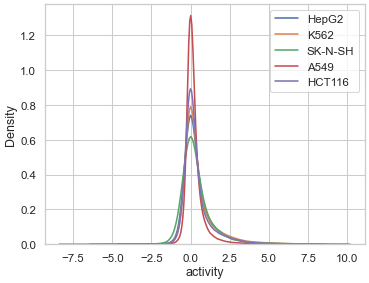

-8.160951810537977 2.1823089752198346
-6.520107909979088 1.8435802387347249
-6.695135936502804 1.6262131901672545
-6.270435116698214 2.0984530243654826
-6.0288871269321485 1.9669825015863966


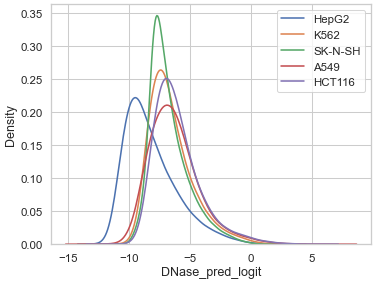

-8.498114622591611 1.7741198102940927
-9.042387531777054 1.5853098566199415
-8.127889813909688 1.4425797552944337
-8.068611658873202 1.719041849148254
-7.9539486033855615 1.552471178288036


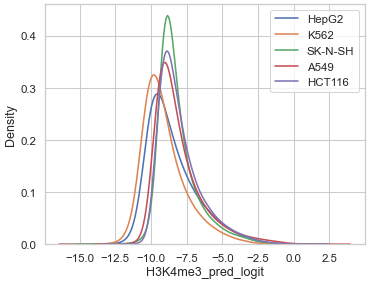

-9.67556029393738 1.4968444933159035
-8.410514396173872 1.0918490923145225
-8.67646863306642 1.3631926600381008
-8.955362424134192 1.6520110612947627
-8.154470854209269 1.336717290649905


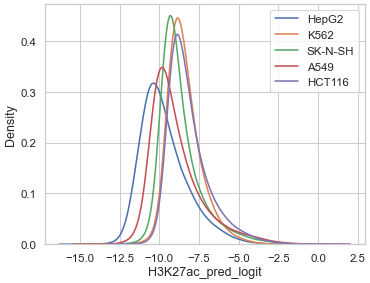

-8.442605059991019 2.122270906016243
-8.687516852542496 1.853777344307241
-9.238645622423448 2.1354543091856497
-7.67693200330618 1.9217621742991533
-8.025488908875747 1.7316605631686162


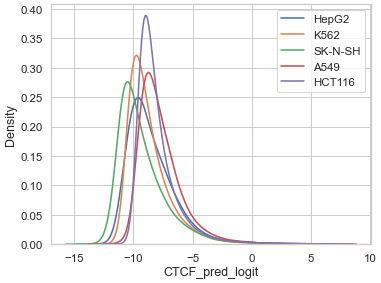

In [10]:
plt.figure(figsize=(8, 6), dpi=50)
plt.subplots_adjust(left=0.13, bottom=0.15, right=0.93, top=0.95)
for cell_type in cell_types:
    y = main_df[f'{cell_type}']
    print(np.mean(y), np.std(y))
    sns.kdeplot(y, label=cell_type)
plt.xlabel('activity')
plt.legend()
plt.savefig(f'figures/activity_kde.png', dpi=200)
plt.show()


for assay in assays:
    plt.figure(figsize=(8, 6), dpi=50)
    plt.subplots_adjust(left=0.13, bottom=0.15, right=0.93, top=0.95)
    for cell_type in cell_types:
        x = main_df[f'{cell_type}_{assay}_pred_logit'].copy()
        print(np.mean(x), np.std(x))
        sns.kdeplot(x, label=cell_type, bw_adjust=2)
    plt.xlabel(f'{assay}_pred_logit')
    plt.legend()
    plt.savefig(f'figures/{assay}_pred_logit_kde.png', dpi=200)
    plt.show()

In [11]:
# normalize between different cell types

# for assay in assays:
#     for cell_type in cell_types:
#         x = main_df[f'{cell_type}_{assay}_pred_logit'].copy()
#         print(np.mean(x), np.std(x))
#         print(np.mean(x[data_split_dict['train']]), np.std(x[data_split_dict['train']]))
#         print(np.mean(x[data_split_dict['valid']]), np.std(x[data_split_dict['valid']]))
#         print(np.mean(x[data_split_dict['test']]), np.std(x[data_split_dict['test']]))

for assay in assays:
    for cell_type in cell_types:
        x = main_df[f'{cell_type}_{assay}_pred_logit'].copy()
        condition = data_split_dict['train']
        x_mean = np.mean(x[condition])
        x_std = np.std(x[condition])
        main_df[f'{cell_type}_{assay}_pred_logit_norm'] = (x - x_mean) / x_std


for cell_type in cell_types:
    x = main_df[f'{cell_type}'].copy()
    condition = data_split_dict['train']
    x_mean = np.mean(x[condition])
    x_std = np.std(x[condition])
    main_df[f'{cell_type}_norm'] = (x - x_mean) / x_std

-0.004520093188600006 0.9960829071194279
-0.0030751569068497298 0.9957561612607748
-0.0030086081535024975 0.9958807073763839
-0.003636491707879556 0.996539254748868
-0.004577132711172084 0.9967111923508591


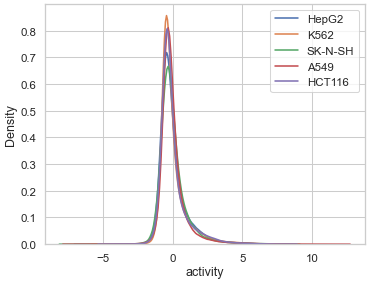

-0.008598353556559071 0.9957528579942048
-0.006624000120646468 0.996270603538475
-0.007753145854126759 0.9943127580762126
-0.0052720663177694554 0.9982462079629534
-0.006154176681437516 0.9974754257507209


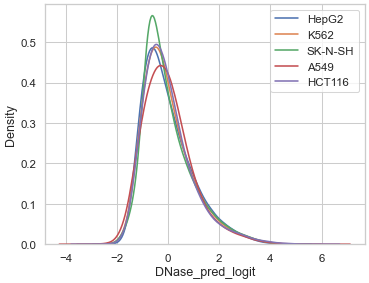

-0.010486441124414497 0.9950954400487235
-0.009765744037595663 0.9951401008937988
-0.00912172590608408 0.994474346650205
-0.01047295354145803 0.9951174652389503
-0.010965535254834688 0.9948799192763508


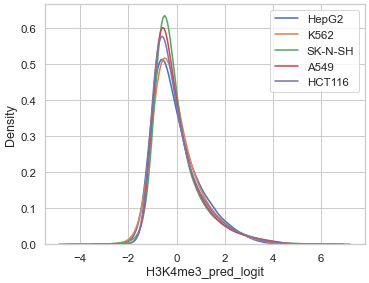

-0.009168752635436867 0.9964183670941849
-0.006548722077099324 0.9966908422441297
-0.003821033051106868 0.9970774468183798
-0.007439572290971091 0.9963566103272432
-0.007413266682184209 0.9963086723314745


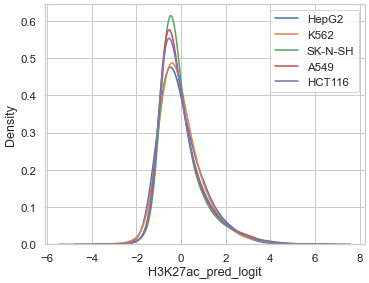

-0.007679015799293654 0.9971042499548287
-0.00810235649830157 0.9959560107115348
-0.007147685517031918 0.9962278301939302
-0.006729851607753895 0.9969150889839191
-0.006736521496229958 0.996898023409784


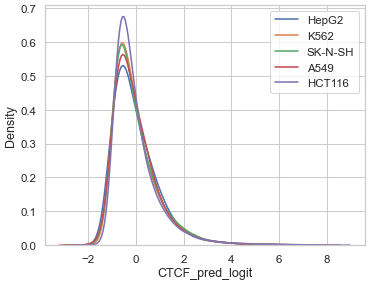

In [12]:
plt.figure(figsize=(8, 6), dpi=50)
plt.subplots_adjust(left=0.13, bottom=0.15, right=0.93, top=0.95)
for cell_type in cell_types:
    y = main_df[f'{cell_type}_norm'].copy()
    print(np.mean(y), np.std(y))
    sns.kdeplot(y, label=cell_type)
plt.xlabel('activity')
plt.legend()
plt.savefig(f'figures/activity_norm_kde.png', dpi=200)
plt.show()


for assay in assays:
    plt.figure(figsize=(8, 6), dpi=50)
    plt.subplots_adjust(left=0.13, bottom=0.15, right=0.93, top=0.95)
    for cell_type in cell_types:
        x = main_df[f'{cell_type}_{assay}_pred_logit_norm'].copy()
        print(np.mean(x), np.std(x))
        sns.kdeplot(x, label=cell_type, bw_adjust=2)
    plt.xlabel(f'{assay}_pred_logit')
    plt.legend()
    plt.savefig(f'figures/{assay}_pred_logit_norm_kde.png', dpi=200)
    plt.show()

In [13]:
pd.options.display.max_columns = 20
pd.options.display.max_rows = 20
pd.options.display.width = 1000

In [14]:
cell_types = ['HepG2', 'K562', 'SK-N-SH', 'A549', 'HCT116']
assays = ['DNase', 'H3K4me3', 'H3K27ac', 'CTCF']
data_splits = ['total', 'train', 'valid', 'test', 'const', 'diff', 'test_const', 'test_diff']

for i, assay in enumerate(assays):
    r_array = np.zeros(shape=(len(cell_types), len(data_splits)))
    r_array = pd.DataFrame(r_array, index=cell_types, columns=data_splits)
    for j, cell_type in enumerate(cell_types):
        for k, data_split in enumerate(data_splits):
            # print(cell_type, data_split)
            condition = data_split_dict[data_split]
            x = main_df[condition][f'{cell_type}']
            y = main_df[condition][f'{cell_type}_{assay}_pred_logit']
            r = pearson(x, y)
            r_array.loc[cell_type, data_split] = r
    print(assay)
    print(r_array)
    print()

DNase
            total     train     valid      test     const      diff  test_const  test_diff
HepG2    0.444434  0.446442  0.437585  0.426991  0.346907  0.501308    0.327626   0.486716
K562     0.498697  0.501600  0.490281  0.472865  0.387251  0.518750    0.363489   0.488412
SK-N-SH  0.375099  0.377225  0.373917  0.346379  0.300512  0.391879    0.274367   0.357989
A549     0.342703  0.343681  0.343723  0.331447  0.235829  0.347608    0.223091   0.346036
HCT116   0.423424  0.424861  0.425175  0.403803  0.300171  0.532645    0.283223   0.531979

H3K4me3
            total     train     valid      test     const      diff  test_const  test_diff
HepG2    0.465948  0.467498  0.460386  0.452285  0.379096  0.543507    0.363695   0.539537
K562     0.449532  0.451556  0.443410  0.431602  0.347015  0.488338    0.331582   0.470003
SK-N-SH  0.484465  0.485553  0.489165  0.462429  0.395832  0.564925    0.376787   0.539801
A549     0.360124  0.358952  0.372230  0.356289  0.262079  0.380365    0.25

In [ ]:
# # 比较是否使用norm，发现norm效果好
# # 只需要一个细胞类型足以训练可以泛化的模型

# print(f'features = pred_logit')
# print(f'model = LinearRegression()\n')


# for cell_type in cell_types:
#     # train
#     data_split = 'train'
#     print(f'train dataset = {cell_type} {data_split}\n')
#     condition = data_split_dict[data_split]
#     selected_columns = [f'{cell_type}_{assay}_pred_logit' for assay in assays]
#     X_train = np.array(main_df[condition][selected_columns])
#     y_train = np.array(main_df[condition][f'{cell_type}'])
#     X_train, y_train = remove_nan(X_train, y_train)
#     if len(X_train) == 0:
#         continue
    
#     model = LinearRegression()
#     # model = MLPRegressor(hidden_layer_sizes=10, alpha=1e-3)
#     model.fit(X_train, y_train)


#     # valid
#     r_array = np.zeros(shape=(len(cell_types), len(data_splits)))
#     r_array = pd.DataFrame(r_array, index=cell_types, columns=data_splits)
#     for cell_type in cell_types:
#         for data_split in data_splits:
#             condition = data_split_dict[data_split]
#             selected_columns = [f'{cell_type}_{assay}_pred_logit' for assay in assays]
#             X_valid = np.array(main_df[condition][selected_columns])
#             y_valid = np.array(main_df[condition][f'{cell_type}'])
#             X_valid, y_valid = remove_nan(X_valid, y_valid)
#             if len(X_valid) == 0:
#                 continue
#             y_pred = model.predict(X_valid)
#             r = pearson(y_valid, y_pred)
#             r_array.loc[cell_type, data_split] = r


#     print(r_array)
#     print()

features = pred_logit
model = LinearRegression()

train dataset = HepG2 train

           total     train     valid      test     const      diff  test_const  test_diff
HepG2   0.495918  0.498529  0.487714  0.472868  0.306019  0.539319    0.275817   0.520935
K562    0.497692  0.500775  0.489812  0.468190  0.289228  0.527966    0.262846   0.493017
SKNSH   0.272513  0.276777  0.265975  0.226473  0.135406  0.315668    0.104370   0.272666
A549    0.352972  0.354939  0.354404  0.330653  0.147159  0.404490    0.115522   0.394035
HCT116  0.428011  0.429719  0.430870  0.403895  0.159734  0.543239    0.139233   0.533688

train dataset = K562 train

           total     train     valid      test     const      diff  test_const  test_diff
HepG2   0.455631  0.458735  0.445784  0.428958  0.251702  0.493302    0.220298   0.470464
K562    0.526702  0.530582  0.516416  0.490622  0.302249  0.559890    0.276122   0.514887
SKNSH   0.084979  0.089814  0.073108  0.038565  0.020203  0.095395   -0.004104   0

In [13]:
print(f'features = pred_logit_norm')
print(f'model = LinearRegression()\n')


for cell_type in cell_types:
    # train
    data_split = 'train'
    print(f'train dataset = {cell_type} {data_split}\n')
    condition = data_split_dict[data_split]
    selected_columns = [f'{cell_type}_{assay}_pred_logit_norm' for assay in assays]
    X_train = np.array(main_df[condition][selected_columns])
    y_train = np.array(main_df[condition][f'{cell_type}'])
    X_train, y_train = remove_nan(X_train, y_train)
    if len(X_train) == 0:
        continue
    
    model = LinearRegression()
    # model = MLPRegressor(hidden_layer_sizes=10, alpha=1e-3)
    model.fit(X_train, y_train)


    # valid
    r_array = np.zeros(shape=(len(cell_types), len(data_splits)))
    r_array = pd.DataFrame(r_array, index=cell_types, columns=data_splits)
    for cell_type in cell_types:
        for data_split in data_splits:
            condition = data_split_dict[data_split]
            selected_columns = [f'{cell_type}_{assay}_pred_logit_norm' for assay in assays]
            X_valid = np.array(main_df[condition][selected_columns])
            y_valid = np.array(main_df[condition][f'{cell_type}'])
            X_valid, y_valid = remove_nan(X_valid, y_valid)
            if len(X_valid) == 0:
                continue
            y_pred = model.predict(X_valid)
            r = pearson(y_valid, y_pred)
            r_array.loc[cell_type, data_split] = r


    print(r_array)
    print()

features = pred_logit_norm
model = LinearRegression()

train dataset = HepG2 train

           total     train     valid      test     const      diff  test_const  test_diff
HepG2   0.495918  0.498529  0.487714  0.472868  0.306019  0.539319    0.275817   0.520935
K562    0.498998  0.502278  0.490903  0.467299  0.289757  0.530186    0.262871   0.492157
SKNSH   0.350664  0.353984  0.347603  0.310900  0.191559  0.392094    0.162440   0.353622
A549    0.367997  0.369475  0.371769  0.347865  0.158110  0.414024    0.127352   0.407609
HCT116  0.427193  0.428915  0.429928  0.402916  0.158892  0.542442    0.137410   0.533120

train dataset = K562 train

           total     train     valid      test     const      diff  test_const  test_diff
HepG2   0.465759  0.468591  0.456649  0.441350  0.262003  0.505011    0.230759   0.484792
K562    0.526702  0.530582  0.516416  0.490622  0.302249  0.559890    0.276122   0.514887
SKNSH   0.253843  0.257825  0.246279  0.211106  0.128830  0.278993    0.10212

In [ ]:
print(f'5 cell type train')
print(f'features = pred_logit_norm')
# print(f'model = LinearRegression()\n')
print(f'model = MLPRegressor(hidden_layer_sizes=10, alpha=1e-3)\n')

cell_types = ['HepG2', 'K562', 'SK-N-SH', 'A549', 'HCT116']
assays = ['DNase', 'H3K4me3', 'H3K27ac', 'CTCF']
data_splits = ['total', 'train', 'valid', 'test', 'const', 'diff', 'test_const', 'test_diff']


valid_cell_type_r_array = np.zeros(shape=(len(cell_types), len(data_splits)))
valid_cell_type_r_array = pd.DataFrame(valid_cell_type_r_array, index=cell_types, columns=data_splits)



# train
data_split = 'train'

train_cell_types = cell_types
valid_cell_types = cell_types

print(f'train dataset = {train_cell_types} {data_split}')
print(f'valid dataset = {valid_cell_types}\n')

X_train = []
y_train = []
for train_cell_type in train_cell_types:
    condition = data_split_dict[data_split]
    df = main_df[condition]
    X_columns = [f'{train_cell_type}_{assay}_pred_logit_norm' for assay in assays]
    y_column = train_cell_type
    X_train.append(df[X_columns])
    y_train.append(df[y_column])

X_train = np.concatenate(X_train, axis=0)
y_train = np.concatenate(y_train, axis=0)

X_train, y_train = remove_nan(X_train, y_train)
# if len(X_train) == 0:
#     continue

# 特征数量太少，ElasticNet和logistic regression几乎一样
# model = LinearRegression()
model = MLPRegressor(hidden_layer_sizes=100, alpha=1e-3)
model.fit(X_train, y_train)


# valid
r_array = np.zeros(shape=(len(cell_types), len(data_splits)))
r_array = pd.DataFrame(r_array, index=cell_types, columns=data_splits)

for cell_type in cell_types:
    for data_split in data_splits:
        condition = data_split_dict[data_split]
        selected_columns = [f'{cell_type}_{assay}_pred_logit_norm' for assay in assays]
        X_valid = np.array(main_df[condition][selected_columns])
        y_valid = np.array(main_df[condition][f'{cell_type}'])
        X_valid, y_valid = remove_nan(X_valid, y_valid)
        if len(X_valid) == 0:
            continue
        y_pred = model.predict(X_valid)

        r = pearson(y_valid, y_pred)
        r_array.loc[cell_type, data_split] = r


print(r_array)
print()

5 cell type train
features = pred_logit_norm
model = LinearRegression()

model = MLPRegressor(hidden_layer_sizes=10, alpha=1e-3)

train dataset = ['HepG2', 'K562', 'SKNSH', 'A549', 'HCT116'] train
valid dataset = ['HepG2', 'K562', 'SKNSH', 'A549', 'HCT116']

           total     train     valid      test     const      diff  test_const  test_diff
HepG2   0.548663  0.551035  0.542025  0.527311  0.359454  0.554712    0.335581   0.536797
K562    0.608456  0.610986  0.604442  0.580489  0.386661  0.608218    0.369718   0.577916
SKNSH   0.542263  0.542904  0.548626  0.525010  0.354186  0.564681    0.353635   0.542901
A549    0.512488  0.512859  0.520709  0.498265  0.324715  0.503622    0.296541   0.502884
HCT116  0.575355  0.575960  0.579514  0.562346  0.341223  0.620806    0.335684   0.619497



In [ ]:
print(f'5 cell type train')
print(f'features = pred_logit_norm')
# print(f'model = LinearRegression()\n')
print(f'model = MLPRegressor(hidden_layer_sizes=100, alpha=1e-3)\n')

cell_types = ['HepG2', 'K562', 'SK-N-SH', 'A549', 'HCT116']
assays = ['DNase', 'H3K4me3', 'H3K27ac', 'CTCF']
data_splits = ['total', 'train', 'valid', 'test', 'const', 'diff', 'test_const', 'test_diff']


valid_cell_type_r_array = np.zeros(shape=(len(cell_types), len(data_splits)))
valid_cell_type_r_array = pd.DataFrame(valid_cell_type_r_array, index=cell_types, columns=data_splits)



# train
data_split = 'train'

train_cell_types = cell_types
valid_cell_types = cell_types

print(f'train dataset = {train_cell_types} {data_split}')
print(f'valid dataset = {valid_cell_types}\n')

X_train = []
y_train = []
for train_cell_type in train_cell_types:
    condition = data_split_dict[data_split]
    df = main_df[condition]
    X_columns = [f'{train_cell_type}_{assay}_pred_logit_norm' for assay in assays]
    y_column = train_cell_type
    X_train.append(df[X_columns])
    y_train.append(df[y_column])

X_train = np.concatenate(X_train, axis=0)
y_train = np.concatenate(y_train, axis=0)

X_train, y_train = remove_nan(X_train, y_train)
# if len(X_train) == 0:
#     continue

# 特征数量太少，ElasticNet和logistic regression几乎一样
# model = LinearRegression()
model = MLPRegressor(hidden_layer_sizes=100, alpha=1e-3)
model.fit(X_train, y_train)


# valid
r_array = np.zeros(shape=(len(cell_types), len(data_splits)))
r_array = pd.DataFrame(r_array, index=cell_types, columns=data_splits)

for cell_type in cell_types:
    for data_split in data_splits:
        condition = data_split_dict[data_split]
        selected_columns = [f'{cell_type}_{assay}_pred_logit_norm' for assay in assays]
        X_valid = np.array(main_df[condition][selected_columns])
        y_valid = np.array(main_df[condition][f'{cell_type}'])
        X_valid, y_valid = remove_nan(X_valid, y_valid)
        if len(X_valid) == 0:
            continue
        y_pred = model.predict(X_valid)

        r = pearson(y_valid, y_pred)
        r_array.loc[cell_type, data_split] = r


print(r_array)
print()

5 cell type train
features = pred_logit_norm
model = MLPRegressor(hidden_layer_sizes=100, alpha=1e-3)

train dataset = ['HepG2', 'K562', 'SKNSH', 'A549', 'HCT116'] train
valid dataset = ['HepG2', 'K562', 'SKNSH', 'A549', 'HCT116']

           total     train     valid      test     const      diff  test_const  test_diff
HepG2   0.555111  0.557488  0.548350  0.534362  0.367767  0.560654    0.343893   0.543656
K562    0.612947  0.615450  0.608153  0.586215  0.392683  0.611701    0.376193   0.582443
SKNSH   0.555862  0.556546  0.563442  0.537220  0.372473  0.578489    0.369738   0.554655
A549    0.514611  0.515705  0.518707  0.497994  0.324221  0.507931    0.293372   0.504527
HCT116  0.576354  0.577248  0.578744  0.562301  0.339569  0.623042    0.333306   0.619735



In [ ]:
print(f'leave one out validation')
print(f'features = pred_logit_norm')
print(f'model = MLPRegressor(hidden_layer_sizes=10, alpha=1e-3)\n')

cell_types = ['HepG2', 'K562', 'SK-N-SH', 'A549', 'HCT116']
assays = ['DNase', 'H3K4me3', 'H3K27ac', 'CTCF']
data_splits = ['total', 'train', 'valid', 'test', 'const', 'diff', 'test_const', 'test_diff']


valid_cell_type_r_array = np.zeros(shape=(len(cell_types), len(data_splits)))
valid_cell_type_r_array = pd.DataFrame(valid_cell_type_r_array, index=cell_types, columns=data_splits)


for cell_type in cell_types:
    # train
    data_split = 'train'
    train_cell_types = [ct for ct in cell_types if ct != cell_type]
    valid_cell_types = [cell_type]
    print(f'train dataset = {train_cell_types} {data_split}')
    print(f'valid dataset = {valid_cell_types}\n')
    X_train = []
    y_train = []
    for train_cell_type in train_cell_types:
        condition = data_split_dict[data_split]
        df = main_df[condition]
        X_columns = [f'{train_cell_type}_{assay}_pred_logit_norm' for assay in assays]
        y_column = train_cell_type
        X_train.append(df[X_columns])
        y_train.append(df[y_column])

    X_train = np.concatenate(X_train, axis=0)
    y_train = np.concatenate(y_train, axis=0)

    X_train, y_train = remove_nan(X_train, y_train)
    if len(X_train) == 0:
        continue
    
    # 特征数量太少，ElasticNet和logistic regression几乎一样
    # model = LinearRegression()
    # model = ElasticNet(alpha=1e-3, l1_ratio=0.5)
    model = MLPRegressor(hidden_layer_sizes=10, alpha=1e-3)
    model.fit(X_train, y_train)


    # valid
    r_array = np.zeros(shape=(len(cell_types), len(data_splits)))
    r_array = pd.DataFrame(r_array, index=cell_types, columns=data_splits)

    for cell_type in cell_types:
        for data_split in data_splits:
            condition = data_split_dict[data_split]
            selected_columns = [f'{cell_type}_{assay}_pred_logit_norm' for assay in assays]
            X_valid = np.array(main_df[condition][selected_columns])
            y_valid = np.array(main_df[condition][f'{cell_type}'])
            X_valid, y_valid = remove_nan(X_valid, y_valid)
            if len(X_valid) == 0:
                continue
            y_pred = model.predict(X_valid)
            r = pearson(y_valid, y_pred)
            r_array.loc[cell_type, data_split] = r

        if cell_type in valid_cell_types:
            valid_cell_type_r_array.loc[cell_type] = r_array.loc[cell_type]


    print(r_array)
    print()

print('leave one out validation')
print(valid_cell_type_r_array)

leave one out validation
features = pred_logit_norm
model = MLPRegressor(hidden_layer_sizes=10, alpha=1e-3)

train dataset = ['K562', 'SKNSH', 'A549', 'HCT116'] train
valid dataset = ['HepG2']

           total     train     valid      test     const      diff  test_const  test_diff
HepG2   0.542368  0.544533  0.537253  0.521933  0.437301  0.560862    0.414936   0.549841
K562    0.606201  0.608722  0.601563  0.579051  0.481492  0.600957    0.450752   0.583690
SKNSH   0.546592  0.547211  0.553640  0.528731  0.442202  0.584279    0.425794   0.569115
A549    0.508958  0.509225  0.517857  0.494946  0.401017  0.489459    0.378225   0.486530
HCT116  0.574412  0.574987  0.578282  0.561856  0.449357  0.645953    0.434832   0.663527

train dataset = ['HepG2', 'SKNSH', 'A549', 'HCT116'] train
valid dataset = ['K562']

           total     train     valid      test     const      diff  test_const  test_diff
HepG2   0.548077  0.550265  0.542055  0.528264  0.444928  0.568318    0.423956   0.557709


In [ ]:
print(f'leave one out validation')
print(f'features = pred_logit_norm')
print(f'model = MLPRegressor(hidden_layer_sizes=100, alpha=1e-3)\n')

cell_types = ['HepG2', 'K562', 'SK-N-SH', 'A549', 'HCT116']
assays = ['DNase', 'H3K4me3', 'H3K27ac', 'CTCF']
data_splits = ['total', 'train', 'valid', 'test', 'const', 'diff', 'test_const', 'test_diff']


valid_cell_type_r_array = np.zeros(shape=(len(cell_types), len(data_splits)))
valid_cell_type_r_array = pd.DataFrame(valid_cell_type_r_array, index=cell_types, columns=data_splits)


for cell_type in cell_types:
    # train
    data_split = 'train'
    train_cell_types = [ct for ct in cell_types if ct != cell_type]
    valid_cell_types = [cell_type]
    print(f'train dataset = {train_cell_types} {data_split}')
    print(f'valid dataset = {valid_cell_types}\n')
    X_train = []
    y_train = []
    for train_cell_type in train_cell_types:
        condition = data_split_dict[data_split]
        df = main_df[condition]
        X_columns = [f'{train_cell_type}_{assay}_pred_logit_norm' for assay in assays]
        y_column = train_cell_type
        X_train.append(df[X_columns])
        y_train.append(df[y_column])

    X_train = np.concatenate(X_train, axis=0)
    y_train = np.concatenate(y_train, axis=0)

    X_train, y_train = remove_nan(X_train, y_train)
    if len(X_train) == 0:
        continue
    
    model = MLPRegressor(hidden_layer_sizes=100, alpha=1e-3)
    model.fit(X_train, y_train)


    # valid
    r_array = np.zeros(shape=(len(cell_types), len(data_splits)))
    r_array = pd.DataFrame(r_array, index=cell_types, columns=data_splits)

    for cell_type in cell_types:
        for data_split in data_splits:
            condition = data_split_dict[data_split]
            selected_columns = [f'{cell_type}_{assay}_pred_logit_norm' for assay in assays]
            X_valid = np.array(main_df[condition][selected_columns])
            y_valid = np.array(main_df[condition][f'{cell_type}'])
            X_valid, y_valid = remove_nan(X_valid, y_valid)
            if len(X_valid) == 0:
                continue
            y_pred = model.predict(X_valid)
            r = pearson(y_valid, y_pred)
            r_array.loc[cell_type, data_split] = r

        if cell_type in valid_cell_types:
            valid_cell_type_r_array.loc[cell_type] = r_array.loc[cell_type]


    print(r_array)
    print()

print('leave one out validation')
print(valid_cell_type_r_array)

leave one out validation
features = pred_logit_norm
model = MLPRegressor(hidden_layer_sizes=100, alpha=1e-3)

train dataset = ['K562', 'SKNSH', 'A549', 'HCT116'] train
valid dataset = ['HepG2']



/home/hxcai/anaconda3/envs/torch/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:698: UserWarning: Training interrupted by user.
  warnings.warn("Training interrupted by user.")


           total     train     valid      test     const      diff  test_const  test_diff
HepG2   0.541067  0.543359  0.535116  0.520703  0.436905  0.559068    0.414649   0.546112
K562    0.609825  0.612371  0.604116  0.583257  0.486764  0.602371    0.456321   0.584641
SKNSH   0.557938  0.558532  0.565442  0.540418  0.455967  0.592998    0.440120   0.575076
A549    0.511929  0.512846  0.517429  0.495287  0.400615  0.497400    0.374618   0.491924
HCT116  0.575913  0.576992  0.576118  0.562181  0.449036  0.648099    0.432712   0.664952

train dataset = ['HepG2', 'SKNSH', 'A549', 'HCT116'] train
valid dataset = ['K562']

